In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Excel
file_path = 'ventas_2024.xlsx'  # Asegúrate de que la ruta sea correcta
data = pd.read_excel(file_path)

# Mostrar las primeras filas del DataFrame
print(data.head())

    AÑO  MES                      UBICACIÓN  VENTAS_NETAS_TARIFA_12  \
0  2024    3  AZUAY - CAMILO PONCE ENRIQUEZ                72338385   
1  2024    3  AZUAY - CAMILO PONCE ENRIQUEZ                       0   
2  2024    4  AZUAY - CAMILO PONCE ENRIQUEZ               206663373   
3  2024    4  AZUAY - CAMILO PONCE ENRIQUEZ                       0   
4  2024    4  AZUAY - CAMILO PONCE ENRIQUEZ                    7157   

   VENTAS_NETAS_TARIFA_0  EXPORTACIONES  COMPRAS_NETAS_TARIFA_12  \
0                7663994              0                 65331396   
1                  10320              0                        0   
2              248924826     1163601314                210266217   
3                  11000              0                    10544   
4                   4080              0                   139916   

   COMPRAS_NETAS_TARIFA_0  IMPORTACIONES  COMPRAS_RISE  TOTAL_COMPRAS  \
0                10324438              0          1200       75667834   
1                 

C:\Users\Andrews\AppData\Local\Temp\ipykernel_6684\1116332116.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_data, x='total_ventas', y='UBICACIÓN', palette=color_palette, edgecolor='black')


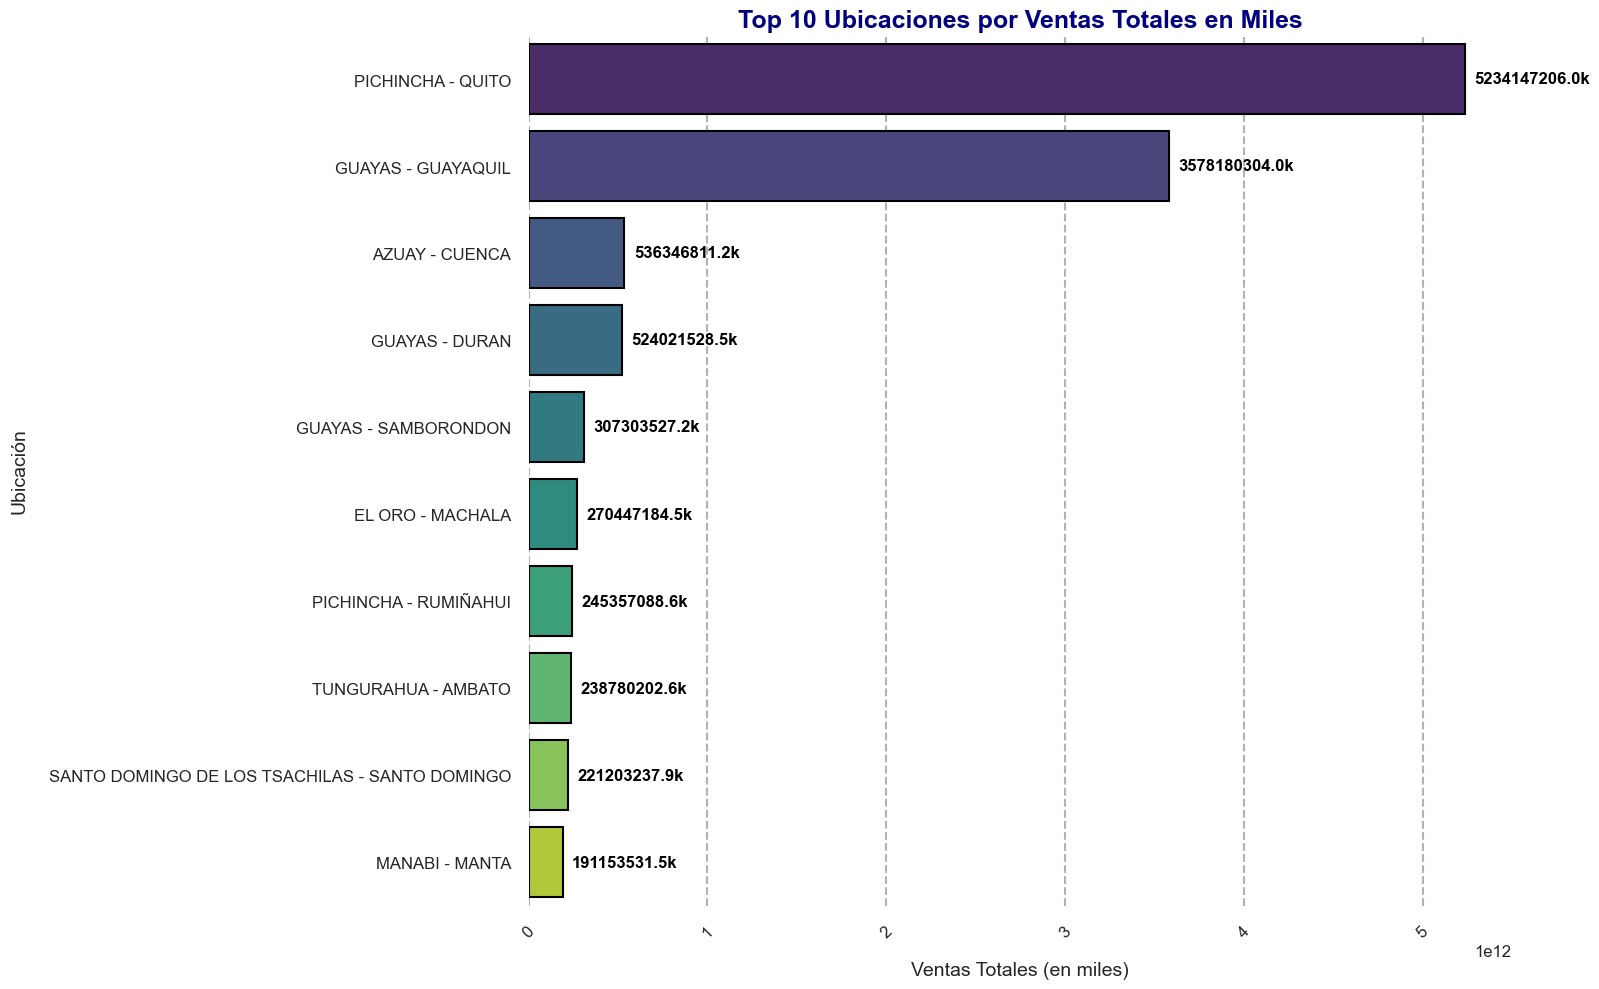

In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn y ajustar detalles visuales
sns.set(style="whitegrid", context="talk")
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# Cargar el archivo Excel
data = pd.read_excel('ventas_2024.xlsx')

# Crear columna de fecha
data['FECHA'] = pd.to_datetime(data['AÑO'].astype(str) + '-' + data['MES'].astype(str) + '-01')

# Calcular estadísticas demográficas por ubicación
demografia_ubicacion = data.groupby('UBICACIÓN').agg(
    total_ventas=('TOTAL_VENTAS', 'sum'),
    promedio_ventas=('TOTAL_VENTAS', 'mean')
).sort_values(by='total_ventas', ascending=False).reset_index()

# Visualización demográfica: Top 10 ubicaciones por ventas totales
plt.figure(figsize=(16, 10))
top_10_data = demografia_ubicacion.head(10)
color_palette = sns.color_palette("viridis", len(top_10_data))

# Crear gráfico de barras
ax = sns.barplot(data=top_10_data, x='total_ventas', y='UBICACIÓN', palette=color_palette, edgecolor='black')
plt.title('Top 10 Ubicaciones por Ventas Totales en Miles', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Ventas Totales (en miles)', fontsize=14, labelpad=15)
plt.ylabel('Ubicación', fontsize=14, labelpad=15)

# Agregar etiquetas de valor a cada barra
for index, value in enumerate(top_10_data['total_ventas']):
    plt.text(value + max(top_10_data['total_ventas']) * 0.01, index, f'{value/1000:.1f}k', 
             va='center', ha='left', fontsize=12, color='black', weight='bold')

# Ajustes adicionales de formato
sns.despine(left=True, bottom=True)
plt.grid(visible=True, which='both', axis='x', linestyle='--', color='grey', alpha=0.6)
plt.xticks(rotation=45)

# Ajustar layout y mostrar gráfico
plt.tight_layout()
plt.show()


c:\Users\Andrews\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Andrews\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Andrews\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Andrews\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal 

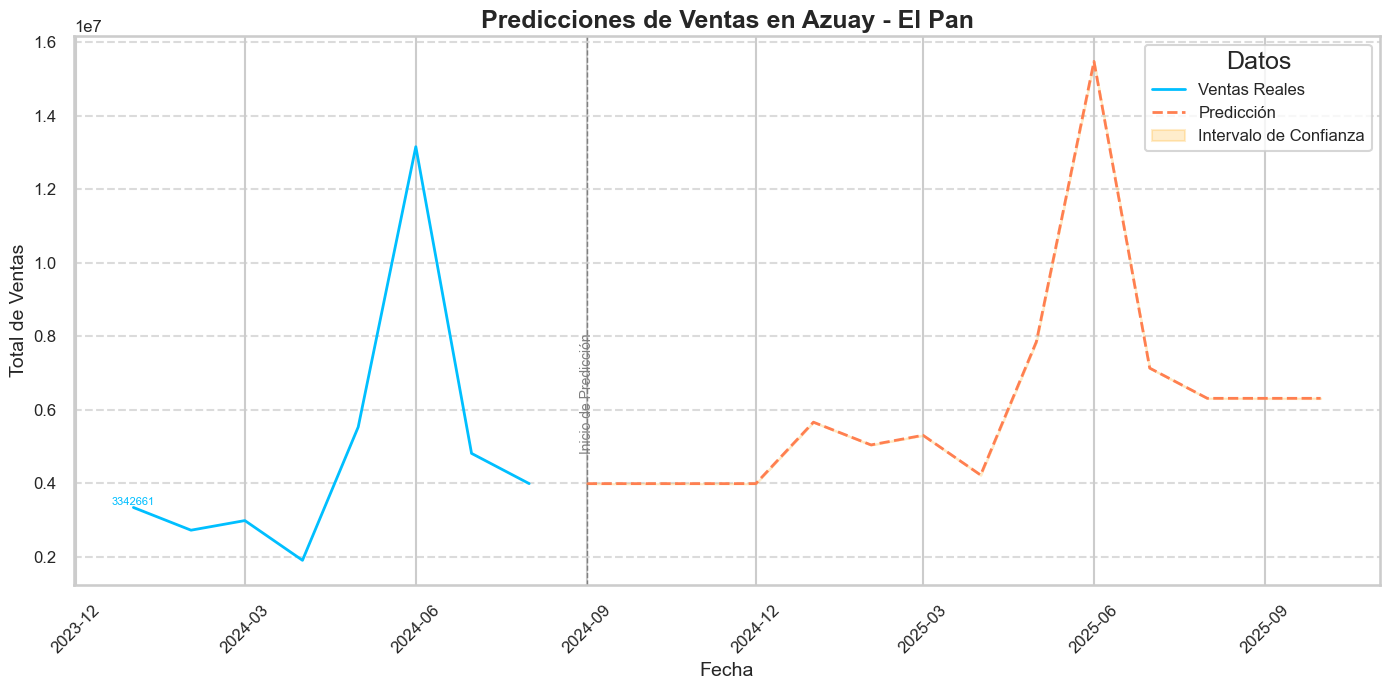

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.statespace.sarimax import SARIMAX
import tkinter as tk
from tkinter import messagebox, filedialog, ttk

# Carga de datos inicial
data = pd.read_excel('ventas_2024.xlsx')
data['UBICACIÓN'] = data['UBICACIÓN'].str.strip().str.title()
data['FECHA'] = pd.to_datetime(data['AÑO'].astype(str) + '-' + data['MES'].astype(str) + '-01')
ventas_ciudades = data.groupby(['FECHA', 'UBICACIÓN'])['TOTAL_VENTAS'].sum().reset_index()

# Función para actualizar el menú de ubicaciones
def actualizar_menu_ciudades():
    ciudad_menu['menu'].delete(0, 'end')
    for ciudad in ventas_ciudades['UBICACIÓN'].unique():
        ciudad_menu['menu'].add_command(label=ciudad, command=tk._setit(ciudad_var, ciudad))

# Función para generar predicciones
def generar_prediccion(ciudad_seleccionada, periodo, frecuencia, tipo_grafico):
    try:
        if ciudad_seleccionada in ventas_ciudades['UBICACIÓN'].values:
            # Filtro de datos por ubicación
            ventas_ciudad = ventas_ciudades[ventas_ciudades['UBICACIÓN'] == ciudad_seleccionada].set_index('FECHA')['TOTAL_VENTAS']
            modelo = SARIMAX(ventas_ciudad, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
            modelo_fit = modelo.fit(disp=False)
            
            # Predicción de ventas con intervalos de confianza
            if frecuencia == 'semanal':
                steps = int(periodo * 7)
            elif frecuencia == 'trimestral':
                steps = periodo * 3
            else:  # Anual
                steps = periodo * 12
            
            pred = modelo_fit.get_forecast(steps=steps)
            pred_mean = pred.predicted_mean
            pred_conf = pred.conf_int()

            # Configuración del gráfico
            plt.figure(figsize=(14, 7))
            plt.plot(ventas_ciudad, label='Ventas Reales', color='deepskyblue', linewidth=2)
            plt.plot(pred_mean, label='Predicción', linestyle='--', color='coral', linewidth=2)
            
            # Sombreamos la zona de incertidumbre en la predicción
            plt.fill_between(pred_mean.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='orange', alpha=0.2, label="Intervalo de Confianza")

            # Añadir etiquetas de puntos clave
            for date, value in ventas_ciudad.items():
                if date.month == 1:  # Etiqueta solo en los comienzos de año para claridad
                    plt.text(date, value, f'{value:.0f}', ha='center', va='bottom', fontsize=8, color='deepskyblue')
            
            # Anotación para el inicio de predicción
            plt.axvline(x=pred_mean.index[0], color='gray', linestyle='--', linewidth=1)
            plt.text(pred_mean.index[0], ventas_ciudad.mean(), 'Inicio de Predicción', color='gray', ha='center', va='bottom', rotation=90)

            # Formato del gráfico para mayor comprensión
            plt.title(f'Predicciones de Ventas en {ciudad_seleccionada}', fontsize=18, fontweight='bold')
            plt.xlabel('Fecha', fontsize=14)
            plt.ylabel('Total de Ventas', fontsize=14)
            plt.legend(title='Datos', fontsize=12)
            
            # Formateo de fechas en el eje x para que sean más legibles
            plt.xticks(rotation=45)
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Mostrar cada 3 meses
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
        else:
            messagebox.showerror("Error", f"La ciudad '{ciudad_seleccionada}' no se encuentra en la lista.")
    except Exception as e:
        messagebox.showerror("Error", str(e))


# Función para limpiar los campos de entrada
def limpiar_campos():
    ciudad_var.set('')
    frecuencia_var.set('semanal')
    periodo_var.set('1')
    tipo_grafico_var.set('Línea')

# Función de ayuda
def mostrar_ayuda():
    ayuda_texto = (
        "Instrucciones para usar el programa:\n\n"
        "1. Seleccione una ciudad.\n"
        "2. Elija la frecuencia de las predicciones.\n"
        "3. Seleccione el período de tiempo.\n"
        "4. Elija el tipo de gráfico.\n"
        "5. Haga clic en 'Generar Predicción' para ver los resultados.\n\n"
        "El gráfico mostrará ventas reales y predicciones con intervalos de confianza usando el modelo SARIMA."
    )
    messagebox.showinfo("Ayuda", ayuda_texto)

# Función para cargar nuevos datos
def cargar_datos():
    global ventas_ciudades
    file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx")])
    if file_path:
        try:
            data = pd.read_excel(file_path)
            data['UBICACIÓN'] = data['UBICACIÓN'].str.strip().str.title()
            data['FECHA'] = pd.to_datetime(data['AÑO'].astype(str) + '-' + data['MES'].astype(str) + '-01')
            ventas_ciudades = data.groupby(['FECHA', 'UBICACIÓN'])['TOTAL_VENTAS'].sum().reset_index()
            messagebox.showinfo("Éxito", "Datos cargados exitosamente.")
            actualizar_menu_ciudades()
        except Exception as e:
            messagebox.showerror("Error", f"Error al cargar los datos: {str(e)}")

# Crear la interfaz gráfica
root = tk.Tk()
root.title("Predicción de Ventas")
root.geometry("500x600")
root.config(bg='lightsteelblue')

# Etiqueta principal
label = tk.Label(root, text="Predicción de Ventas por Ciudad", font=('Arial', 16, 'bold'), bg='lightsteelblue')
label.pack(pady=20)

# Menú desplegable para ciudad
ciudad_var = tk.StringVar()
ciudad_label = tk.Label(root, text="Ciudad:", bg='lightsteelblue', font=('Arial', 12))
ciudad_label.pack(pady=5)
ciudad_menu = ttk.Combobox(root, textvariable=ciudad_var, values=list(ventas_ciudades['UBICACIÓN'].unique()), state="readonly")
ciudad_menu.pack(pady=5)

# Menú desplegable para frecuencia
frecuencia_var = tk.StringVar(value='semanal')
frecuencia_label = tk.Label(root, text="Frecuencia:", bg='lightsteelblue', font=('Arial', 12))
frecuencia_label.pack(pady=5)
frecuencia_menu = ttk.Combobox(root, textvariable=frecuencia_var, values=['semanal', 'trimestral', 'anual'], state="readonly")
frecuencia_menu.pack(pady=5)

# Menú desplegable para periodo
periodo_var = tk.StringVar(value='1')
periodo_label = tk.Label(root, text="Período:", bg='lightsteelblue', font=('Arial', 12))
periodo_label.pack(pady=5)
periodo_menu = ttk.Combobox(root, textvariable=periodo_var, values=['1', '2', '3'], state="readonly")
periodo_menu.pack(pady=5)

# Menú desplegable para tipo de gráfico
tipo_grafico_var = tk.StringVar(value='Línea')
tipo_grafico_label = tk.Label(root, text="Tipo de gráfico:", bg='lightsteelblue', font=('Arial', 12))
tipo_grafico_label.pack(pady=5)
tipo_grafico_menu = ttk.Combobox(root, textvariable=tipo_grafico_var, values=['Línea', 'Barras'], state="readonly")
tipo_grafico_menu.pack(pady=5)

# Botón de predicción
def generar_prediccion_ciudad():
    ciudad_seleccionada = ciudad_var.get()
    periodo = int(periodo_var.get())
    frecuencia = frecuencia_var.get()
    tipo_grafico = tipo_grafico_var.get()
    if ciudad_seleccionada and periodo and frecuencia:
        generar_prediccion(ciudad_seleccionada, periodo, frecuencia, tipo_grafico)
    else:
        messagebox.showerror("Error", "Por favor seleccione todos los campos.")

btn_generar = tk.Button(root, text="Generar Predicción", command=generar_prediccion_ciudad, bg="coral", font=('Arial', 12, 'bold'))
btn_generar.pack(pady=15)

# Botón de limpieza
btn_limpiar = tk.Button(root, text="Limpiar Campos", command=limpiar_campos, bg="lightgray", font=('Arial', 12))
btn_limpiar.pack(pady=5)

# Botón de carga de datos
btn_cargar = tk.Button(root, text="Cargar Datos", command=cargar_datos, bg="lightgray", font=('Arial', 12))
btn_cargar.pack(pady=5)

# Botón de ayuda
btn_ayuda = tk.Button(root, text="Ayuda", command=mostrar_ayuda, bg="lightgray", font=('Arial', 12))
btn_ayuda.pack(pady=5)

# Ejecutar interfaz
root.mainloop()
